In [1]:
path_to_my_result = r'C:\Users\Администратор\YandexDisk\MAI-SJTU_2021-2022\Дипломники\04_Евгений_Волков\2022-07-09\research_2022-07-10\stringer_1\results_mfree_EFG\result.dat'
input_file = r'C:\Users\Администратор\YandexDisk\MAI-SJTU_2021-2022\Дипломники\04_Евгений_Волков\2022-07-09\research_2022-07-10\stringer_1\results_mfree_EFG\stringer_1.dat'

In [2]:
import pandas as pd
import numpy as np

In [27]:
grids_no = 139
cells_no = 180
# bc_grids_no = stat2.Nodes

In [28]:
grids = pd.read_csv(input_file, sep = '\s+', skiprows=15,names=['Field node','X','Y'],index_col=0,
            nrows=grids_no).sort_index()

In [18]:
# stat = pd.read_csv(path_to_my_result, sep = '\s+',names=['Nodes','Sep','Nodes2', 'Sep2', 'Sep3','Cells'], 
#             nrows=1).iloc[0]
# stat2 = pd.read_csv(path_to_my_result, sep = '\s+',names=['Nodes'], skiprows=stat.Nodes + 1,
#             nrows=1).iloc[0]

In [30]:
elements = pd.read_csv(input_file, sep = '\s+', skiprows=15+grids_no*2+2,
                       names=['Grid_1','Grid_2','Grid_3'],index_col=0,
                        nrows=cells_no)
elements_renum = elements -1

In [31]:
elements_renum

,Grid_1,Grid_2,Grid_3
1,41,42,43
2,49,50,71
3,50,51,71
4,51,52,71
5,52,53,71
...,...,...,...
176,133,117,138
177,94,95,138
178,117,94,138
179,95,96,138


In [37]:
disp = pd.read_csv(path_to_my_result, sep = '\s+', skiprows=1,
                   names=['Field node','U','V','W'],index_col=0,
                       nrows=grids_no).sort_index()

In [38]:
disp

,U,V,W
Field node,,,
1,-0.014178,-0.004134,NaN
2,-0.015475,-0.003859,NaN
3,-0.017402,-0.003729,NaN
4,-0.020172,-0.003736,NaN
5,-0.022813,-0.003505,NaN
...,...,...,...
135,-0.002021,-0.001032,NaN
136,-0.002067,-0.000381,NaN
137,-0.061609,-0.003411,NaN


In [39]:
line_start = 1+grids_no+1
stresses = pd.read_csv(path_to_my_result, sep = '\s+', skiprows=line_start ,
                       names=['Field node','XX','YY','XY'],index_col=0,
             nrows=grids_no).sort_index()

In [40]:
stresses

,XX,YY,XY
Field node,,,
1,1.3603,-0.177050,0.139810
2,2.0093,-0.000539,0.198650
3,2.3920,0.125410,0.291680
4,2.1035,0.045712,0.283310
5,2.4073,0.057729,0.282680
...,...,...,...
135,2.1184,0.209920,0.226170
136,2.0245,0.331430,0.074939
137,4.2503,0.080545,0.789790


In [41]:
# line_start = 1+grids_no+1+bc_grids_no + cells_no + 2*grids_no 
# stresses2 = pd.read_csv(path_to_my_result, sep = '\s+', skiprows=line_start,
#                        names=['Field node','XX','YY','XY', 'Principal_MAX', 'Principal_MIN'],index_col=0,
#              nrows=grids_no).sort_index()

In [43]:
grids_with_disp = grids
grids_with_disp['Ratio'] = 100
grids_with_disp['X_mod'] = grids_with_disp.X + disp.U * grids_with_disp.Ratio
grids_with_disp['Y_mod'] = grids_with_disp.Y + disp.V * grids_with_disp.Ratio

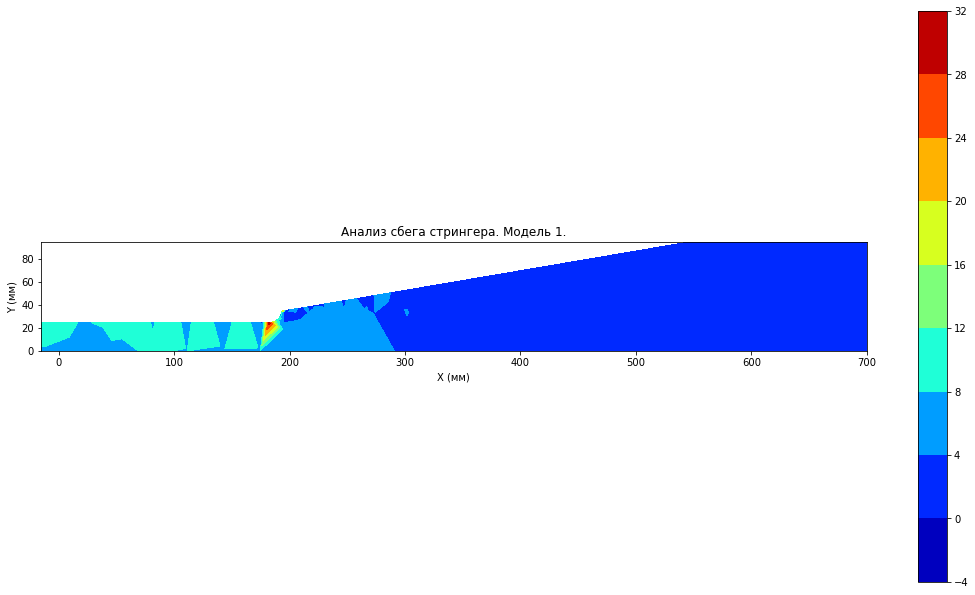

In [47]:
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements):
    for element in elements:
        x = [nodes_x[element[i]] for i in range(len(element))]
        y = [nodes_y[element[i]] for i in range(len(element))]
        plt.fill(x, y, edgecolor='black', fill=False)
        

grids_X = grids_with_disp.X_mod.values.tolist()
grids_Y = grids_with_disp.Y_mod.values.tolist()
# triangulation = tri.Triangulation(grids.X.values.tolist() , grids.Y.values.tolist(), elements_renum.values.tolist())
triangulation = tri.Triangulation(grids_X, grids_Y, elements_renum.values.tolist())
# grids_with_disp
sv = stresses.XX
nodal_values = sv.values.tolist()

# plot the contours
#plot_fem_mesh(grids_X , grids_Y, elements_renum.values.tolist())

cmap = mpl.cm.jet
# plt.figure()

refiner = tri.UniformTriRefiner(triangulation)
tri_refi, z_test_refi = refiner.refine_field(nodal_values, subdiv=3)

plt.gca().set_aspect('equal')
plt.tricontourf(triangulation, nodal_values, cmap=cmap)

# plt.tricontourf(tri_refi, z_test_refi,  cmap=cmap)

plt.colorbar()
plt.title('Анализ сбега стрингера. Модель 1.')
plt.xlabel('X (мм)')
plt.ylabel('Y (мм)')


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=300)

# plt.show()